In [1]:
from pyqgraf import qgraf, model
from feynml.interface.qgraf import style


	Please cite the following papers if you use this code:

      [1] Automatic Feynman graph generation J. Comput. Phys. 105 (1993) 279--289 https://doi.org/10.1006/jcph.1993.1074

      [2] Abusing Qgraf Nucl. Instrum. Methods Phys. Res. A 559 (2006) 220--223 https://doi.org/10.1016/j.nima.2005.11.151

      [3] Feynman graph generation and propagator mixing, I Comput. Phys. Commun. 269 (2021) 108103 https://doi.org/10.1016/j.cpc.2021.108103

	


In [2]:
from feynmodel.interface.ufo import load_ufo_model
from feynmodel.interface.qgraf import feynmodel_to_qgraf
fm = load_ufo_model("ufo_sm")
qfm = feynmodel_to_qgraf(fm, True, False)

In [3]:
qgraf.install("3.6.5")
xml_string = qgraf.run("u[p1], u_bar[p2]", "u[p3], u_bar[p4]",loops=0,loop_momentum="l",model = qfm, style=style)

In [4]:
from xsdata.formats.dataclass.parsers import XmlParser
from pyfeyn2.feynmandiagram import FeynML

parser = XmlParser()
fml = parser.from_string(xml_string, FeynML)

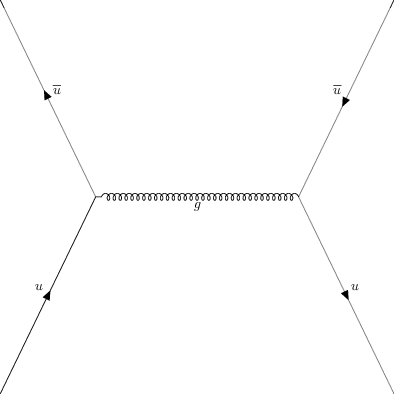

In [5]:
fd1 = fml.diagrams[2]
fd1

In [6]:
fd1.follow_anti_fermion_line(fd1.legs[2])

[Leg(id='Out1', pdgid=2, name='u', type='fermion', particle=<Particle: name="u", pdgid=2, mass=2.2 + 0.5 - 0.3 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=Momentum(name='p3', px=None, py=None, pz=None, e=None), target='Vert2', x=None, y=None, z=None, sense='outgoing', external=None),
 Vertex(id='Vert2', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=None, y=None, z=None, label=None, shape=None),
 Leg(id='Out2', pdgid=-2, name='u_bar', type='anti fermion', particle=<Particle: name="u~", pdgid=-2, mass=2.2 + 0.5 - 0.3 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=Momentum(name='p4', px=None, py=None, pz=None, e=None), target='Vert2', x=None, y=None, z=None, sense='outgoing', external=None)]

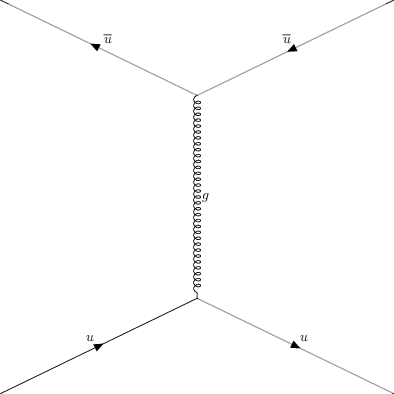

In [7]:
fd2 =fml.diagrams[-1]

fd2

In [8]:
sorted(fd1.get_fermion_line_ends())

[[Leg(id='In2', pdgid=-2, name='u_bar', type='anti fermion', particle=<Particle: name="u~", pdgid=-2, mass=2.2 + 0.5 - 0.3 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=Momentum(name='p2', px=None, py=None, pz=None, e=None), target='Vert1', x=None, y=None, z=None, sense='incoming', external=None),
  Leg(id='In1', pdgid=2, name='u', type='fermion', particle=<Particle: name="u", pdgid=2, mass=2.2 + 0.5 - 0.3 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=Momentum(name='p1', px=None, py=None, pz=None, e=None), target='Vert1', x=None, y=None, z=None, sense='incoming', external=None)],
 [Leg(id='Out1', pdgid=2, name='u', type='fermion', particle=<Particle: name="u", pdgid=2, mass=2.2 + 0.5 - 0.3 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=Momentum(name='p3', px=None, py=None, pz=None, e=None), target='Vert2', x=None, y=None, z=None, sense='outgoing', extern

In [9]:
sorted(fd2.get_fermion_line_ends())

[[Leg(id='In2', pdgid=-2, name='u_bar', type='anti fermion', particle=<Particle: name="u~", pdgid=-2, mass=2.2 + 0.5 - 0.3 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=Momentum(name='p2', px=None, py=None, pz=None, e=None), target='Vert2', x=None, y=None, z=None, sense='incoming', external=None),
  Leg(id='Out2', pdgid=-2, name='u_bar', type='anti fermion', particle=<Particle: name="u~", pdgid=-2, mass=2.2 + 0.5 - 0.3 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=Momentum(name='p4', px=None, py=None, pz=None, e=None), target='Vert2', x=None, y=None, z=None, sense='outgoing', external=None)],
 [Leg(id='Out1', pdgid=2, name='u', type='fermion', particle=<Particle: name="u", pdgid=2, mass=2.2 + 0.5 - 0.3 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=Momentum(name='p3', px=None, py=None, pz=None, e=None), target='Vert1', x=None, y=None, z=None, sense='outg

In [10]:
fd1.get_fermion_factor(fd2)

1


-1

In [11]:
#fd1.propagators[0].momentum.name="p1+p2"
print(fd1)

FeynmanDiagram(id='Diagram3', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, propagators=[Propagator(id='Prop1', pdgid=21, name='g', type='gluon', particle=<Particle: name="g", pdgid=21, mass=0.0 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=Momentum(name='-p1-p2', px=None, py=None, pz=None, e=None), source='Vert2', target='Vert1')], vertices=[Vertex(id='Vert1', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=None, y=None, z=None, label=None, shape=None), Vertex(id='Vert2', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=None, y=None, z=None, label=None, shape=None)], legs=[Leg(id='In1', pdgid=2, name='u', type='fermion', particle=<Particle: name="u", pdgid=2, mass=2.2 + 0.5 - 0.3 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=Momentum(name='p1', px=None, py=None, pz=None, e=None), target='Vert1', x=None, y=None, z=None, sense='incoming', externa

In [12]:
from feynamp.amplitude import square, multiply

s2 =square([fd1,fd2],fm,tag=False)

1


In [13]:
from feynamp.form.color import *
from feynamp.form.lorentz import *
from feynamp.form.momentum import *
fs = ""
fs += get_gammas()
fs += get_color()
fs += get_kinematics()
fs += get_onshell(fd1,fm)
fs += get_mandelstamm_2_to_2(fd2,fm,replace_u=True)
fs

'\n    id epsstar(Muc?,Polb?,Moma?) * eps(Mul?,Pold?,Moma?) = -Metric(Muc,Mul);\n    \n    once u(Spinc?,Momb?)*ubar(Spina?,Momb?) = Gamma(N1_?,Spinc,Spina) * P(N1_?,Momb) + GammaId(Spinc,Spina) * P(N1_?,Momb) * P(N1_?,Momb);\n    \n    once u(Spinc?,Momb?)*ubar(Spina?,Momb?) = Gamma(N2_?,Spinc,Spina) * P(N2_?,Momb) + GammaId(Spinc,Spina) * P(N2_?,Momb) * P(N2_?,Momb);\n    \n    once u(Spinc?,Momb?)*ubar(Spina?,Momb?) = Gamma(N3_?,Spinc,Spina) * P(N3_?,Momb) + GammaId(Spinc,Spina) * P(N3_?,Momb) * P(N3_?,Momb);\n    \n    once u(Spinc?,Momb?)*ubar(Spina?,Momb?) = Gamma(N4_?,Spinc,Spina) * P(N4_?,Momb) + GammaId(Spinc,Spina) * P(N4_?,Momb) * P(N4_?,Momb);\n    \n    once u(Spinc?,Momb?)*ubar(Spina?,Momb?) = Gamma(N5_?,Spinc,Spina) * P(N5_?,Momb) + GammaId(Spinc,Spina) * P(N5_?,Momb) * P(N5_?,Momb);\n    \n    once u(Spinc?,Momb?)*ubar(Spina?,Momb?) = Gamma(N6_?,Spinc,Spina) * P(N6_?,Momb) + GammaId(Spinc,Spina) * P(N6_?,Momb) * P(N6_?,Momb);\n    \n    once u(Spinc?,Momb?)*ubar(Spina?,

In [14]:
rs =apply(s2,fs)
rs

'8*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)^2*G^4*Nc*Cf*mst^2+8*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)^2*G^4*Nc*Cf*mss*mst+4*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)^2*G^4*Nc*Cf*mss^2-8*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)*Den(Mom_p1.Mom_p1-2*Mom_p1.Mom_p3+Mom_p3.Mom_p3)*G^4*Cf*mst^2-16*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)*Den(Mom_p1.Mom_p1-2*Mom_p1.Mom_p3+Mom_p3.Mom_p3)*G^4*Cf*mss*mst-8*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)*Den(Mom_p1.Mom_p1-2*Mom_p1.Mom_p3+Mom_p3.Mom_p3)*G^4*Cf*mss^2+4*Den(Mom_p1.Mom_p1-2*Mom_p1.Mom_p3+Mom_p3.Mom_p3)^2*G^4*Nc*Cf*mst^2+8*Den(Mom_p1.Mom_p1-2*Mom_p1.Mom_p3+Mom_p3.Mom_p3)^2*G^4*Nc*Cf*mss*mst+8*Den(Mom_p1.Mom_p1-2*Mom_p1.Mom_p3+Mom_p3.Mom_p3)^2*G^4*Nc*Cf*mss^2'

In [15]:
rr =apply_den(rs, get_onshell(fd1,fm) + get_mandelstamm_2_to_2(fd1,fm,replace_u=True))

In [16]:
from sympy.parsing.sympy_parser import parse_expr
from sympy import *
ret =simplify(parse_expr(rr.replace("Mom_","").replace(".","_").replace("^","**")
                    .replace("mss","s")
                   .replace("msu","u")
                   .replace("mst","t")))
# here we use the tags to set the right relative sign
ret = simplify(ret.subs("Nc","3").subs("Cf","4/3").subs("fdDiagram3fdDiagram3","1").subs("fdDiagram6fdDiagram6","1").subs("fdDiagram3","1").subs("fdDiagram6","1").subs("fdDiagram3fdDiagram6","-1"))/2/2/3/3 # average spins and colors
ret

8*G**4*(3*s**4 + 2*s**3*t + s**2*t**2 + 2*s*t**3 + 3*t**4)/(27*s**2*t**2)

In [17]:
# Ellis stirling and weber QCD and collider physics Tab 7.1
# https://feyncalc.github.io/FeynCalcExamplesMD/QCD/Tree/QiQibar-QiQibar
from sympy.parsing.sympy_parser import parse_expr
from sympy import *
expected = simplify(parse_expr("""8*G**4*(
-s*t*u**2
+3*t**4
+6*t**3*u
+12*t**2*u**2
+9*t*u**3
+3*u**4
)/(27 *s**2*t**2)""").subs("u","-t-s"))
expected

8*G**4*(3*s**4 + 2*s**3*t + s**2*t**2 + 2*s*t**3 + 3*t**4)/(27*s**2*t**2)

In [18]:
ret.equals(expected)

True